In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

C:\Users\Atul PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Atul PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Atul PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Atul PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

In [3]:
mnist = keras.datasets.mnist.load_data()
type(mnist)

11493376/11490434 [==============================] - 15s 1us/step


tuple

In [4]:
X_train_full, y_train_full, X_test, y_test = mnist[0][0], mnist[0][1], mnist[1][0], mnist[1][1]
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

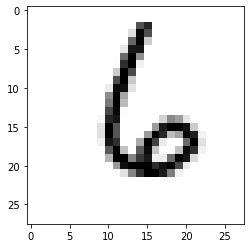

In [5]:
plt.imshow(X_train[3], cmap='binary')

In [12]:
def build_model(n_hidden =1, n_neurons=100, learning_rate=3e-4):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=X_train[0].shape))
  for _ in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [13]:
model = build_model()
history = model.fit(X_train, y_train, validation_split=.1, epochs=30)

Train on 40500 samples, validate on 4500 samples
Epoch 1/30
40500/40500 [==============================] - 2s 48us/sample - loss: 7.4481 - acc: 0.5275 - val_loss: 6.3318 - val_acc: 0.6007
Epoch 2/30
40500/40500 [==============================] - 2s 44us/sample - loss: 5.0139 - acc: 0.6781 - val_loss: 4.0354 - val_acc: 0.7382
Epoch 3/30
40500/40500 [==============================] - 2s 44us/sample - loss: 3.3663 - acc: 0.7817 - val_loss: 3.3841 - val_acc: 0.7807
Epoch 4/30
40500/40500 [==============================] - 2s 43us/sample - loss: 3.0888 - acc: 0.7999 - val_loss: 3.1267 - val_acc: 0.7987
Epoch 5/30
40500/40500 [==============================] - 2s 43us/sample - loss: 2.9150 - acc: 0.8113 - val_loss: 3.0467 - val_acc: 0.8027
Epoch 6/30
40500/40500 [==============================] - 2s 43us/sample - loss: 2.8224 - acc: 0.8179 - val_loss: 2.9073 - val_acc: 0.8131
Epoch 7/30
40500/40500 [==============================] - 2s 45us/sample - loss: 2.7193 - acc: 0.8251 - val_loss: 2.8

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,model.predict_classes(X_valid)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1476
           1       0.97      0.98      0.97      1678
           2       0.96      0.96      0.96      1509
           3       0.94      0.95      0.94      1560
           4       0.94      0.96      0.95      1469
           5       0.94      0.94      0.94      1363
           6       0.97      0.96      0.96      1541
           7       0.96      0.96      0.96      1541
           8       0.92      0.95      0.93      1454
           9       0.95      0.91      0.93      1409

    accuracy                           0.95     15000
   macro avg       0.95      0.95      0.95     15000
weighted avg       0.95      0.95      0.95     15000



<AxesSubplot:>

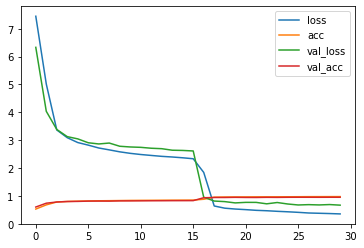

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
model = build_model(n_hidden=3)
history = model.fit(X_train, y_train, validation_split=.1, epochs=30)
#by just increasing the hidden layers to 3, we got around 96% accuracy on validation set

Train on 40500 samples, validate on 4500 samples
Epoch 1/30
40500/40500 [==============================] - 2s 58us/sample - loss: 4.2799 - acc: 0.6878 - val_loss: 2.6210 - val_acc: 0.7940
Epoch 2/30
40500/40500 [==============================] - 2s 56us/sample - loss: 1.9988 - acc: 0.8332 - val_loss: 1.1570 - val_acc: 0.8789
Epoch 3/30
40500/40500 [==============================] - 2s 53us/sample - loss: 0.9020 - acc: 0.8973 - val_loss: 0.8650 - val_acc: 0.8902
Epoch 4/30
40500/40500 [==============================] - 2s 54us/sample - loss: 0.6331 - acc: 0.9180 - val_loss: 0.7056 - val_acc: 0.9064
Epoch 5/30
40500/40500 [==============================] - 2s 52us/sample - loss: 0.4902 - acc: 0.9291 - val_loss: 0.6041 - val_acc: 0.9151
Epoch 6/30
40500/40500 [==============================] - 2s 52us/sample - loss: 0.3968 - acc: 0.9380 - val_loss: 0.5642 - val_acc: 0.9167
Epoch 7/30
40500/40500 [==============================] - 2s 52us/sample - loss: 0.3390 - acc: 0.9437 - val_loss: 0.5

In [24]:
print(classification_report(y_valid, model.predict_classes(X_valid)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1476
           1       0.97      0.99      0.98      1678
           2       0.96      0.94      0.95      1509
           3       0.92      0.93      0.93      1560
           4       0.93      0.93      0.93      1469
           5       0.92      0.90      0.91      1363
           6       0.96      0.96      0.96      1541
           7       0.95      0.93      0.94      1541
           8       0.91      0.92      0.91      1454
           9       0.90      0.92      0.91      1409

    accuracy                           0.94     15000
   macro avg       0.94      0.94      0.94     15000
weighted avg       0.94      0.94      0.94     15000



In [22]:
model.save('mnist_by_ANN.h5')

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Functional API
input_ = keras.layers.InputLayer(shape = [28,28])
hidden1 = keras.layers.Dense(100, activation='relu')(input_)
hidden2 = keras.layers.Dense(100, activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden2, input_])
output = keras.layers.Dense(10, activation='softmax')(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], epochs=30)

ValueError: ('Unrecognized keyword arguments:', dict_keys(['shape']))

In [40]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [47]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

early_stop_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_by_ANN.h5')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [48]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(50, 150),
    'learning_rate': reciprocal(3e-5, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_clf, param_dist, cv=3, n_iter=15, verbose=2)
rnd_search_cv.fit(X_train, y_train, validation_data = [X_valid, y_valid], 
                 callbacks=[early_stop_cb, checkpoint_cb, tensorboard_cb], epochs=75)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] learning_rate=0.0030306791400643834, n_hidden=1, n_neurons=134 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 30000 samples, validate on 15000 samples
Epoch 1/75
30000/30000 [==============================] - 5s 157us/sample - loss: 9.6827 - acc: 0.3969 - val_loss: 8.1848 - val_acc: 0.4897
Epoch 2/75
30000/30000 [==============================] - 4s 129us/sample - loss: 7.5428 - acc: 0.5304 - val_loss: 7.1137 - val_acc: 0.5577
Epoch 3/75
30000/30000 [==============================] - 4s 139us/sample - loss: 7.3123 - acc: 0.5450 - val_loss: 7.2577 - val_acc: 0.5483
Epoch 4/75
30000/30000 [==============================] - 4s 138us/sample - loss: 7.2486 - acc: 0.5494 - val_loss: 7.1716 - val_acc: 0.5539
Epoch 5/75
30000/30000 [==============================] - 4s 128us/sample - loss: 7.3308 - acc: 0.5442 - val_loss: 7.0941 - val_acc: 0.5589
Epoch 6/75
30000/30000 [==============================] - 4s 131us/sample - loss: 7.2538 - acc: 0.5492 - val_loss: 7.0888 - val_acc: 0.5597
Epoch 7/75
30000/30000 [==============================] - 4s 135us/sample - loss: 7.1637 - acc: 0.5549 - val_l

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


Epoch 1/75
30000/30000 [==============================] - 2s 77us/sample - loss: 14.5003 - acc: 0.1003 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 2/75
30000/30000 [==============================] - 2s 83us/sample - loss: 14.5004 - acc: 0.1004 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 3/75
30000/30000 [==============================] - 4s 119us/sample - loss: 14.5004 - acc: 0.1004 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 4/75
30000/30000 [==============================] - 4s 119us/sample - loss: 14.5004 - acc: 0.1004 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 5/75
30000/30000 [==============================] - 3s 115us/sample - loss: 14.5004 - acc: 0.1004 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 6/75
30000/30000 [==============================] - 3s 108us/sample - loss: 14.5004 - acc: 0.1004 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 7/75
30000/30000 [==============================] - 2s 66us/sample - loss: 14.5004 - acc: 0.1004 - val_loss: 14.6041 - val_acc: 0.0939
Epoch 8/7

Epoch 7/75
30000/30000 [==============================] - 2s 81us/sample - loss: 1.0102 - acc: 0.9031 - val_loss: 1.2035 - val_acc: 0.8829
Epoch 8/75
30000/30000 [==============================] - 3s 89us/sample - loss: 0.9036 - acc: 0.9121 - val_loss: 1.1044 - val_acc: 0.8922
Epoch 9/75
30000/30000 [==============================] - 2s 77us/sample - loss: 0.8257 - acc: 0.9201 - val_loss: 1.0736 - val_acc: 0.8945
Epoch 10/75
30000/30000 [==============================] - 2s 77us/sample - loss: 0.7567 - acc: 0.9255 - val_loss: 1.0283 - val_acc: 0.8975
Epoch 11/75
30000/30000 [==============================] - 2s 78us/sample - loss: 0.7028 - acc: 0.9308 - val_loss: 1.0034 - val_acc: 0.9005
Epoch 12/75
30000/30000 [==============================] - 3s 84us/sample - loss: 0.6597 - acc: 0.9346 - val_loss: 0.9561 - val_acc: 0.9025
Epoch 13/75
30000/30000 [==============================] - 3s 86us/sample - loss: 0.6219 - acc: 0.9380 - val_loss: 0.9411 - val_acc: 0.9062
Epoch 14/75
30000/30000

30000/30000 [==============================] - 4s 135us/sample - loss: 0.2608 - acc: 0.9834 - val_loss: 0.7341 - val_acc: 0.9201
Epoch 66/75
30000/30000 [==============================] - 4s 135us/sample - loss: 0.2598 - acc: 0.9835 - val_loss: 0.7278 - val_acc: 0.9205
Epoch 67/75
30000/30000 [==============================] - 4s 124us/sample - loss: 0.2590 - acc: 0.9837 - val_loss: 0.7251 - val_acc: 0.9213
Epoch 68/75
30000/30000 [==============================] - 2s 74us/sample - loss: 0.2583 - acc: 0.9839 - val_loss: 0.7281 - val_acc: 0.9210
Epoch 69/75
30000/30000 [==============================] - 2s 72us/sample - loss: 0.2578 - acc: 0.9839 - val_loss: 0.7265 - val_acc: 0.9208
Epoch 70/75
30000/30000 [==============================] - 2s 70us/sample - loss: 0.2574 - acc: 0.9840 - val_loss: 0.7243 - val_acc: 0.9210
Epoch 71/75
30000/30000 [==============================] - 2s 78us/sample - loss: 0.2569 - acc: 0.9840 - val_loss: 0.7262 - val_acc: 0.9200
Epoch 72/75
30000/30000 [====

30000/30000 [==============================] - 3s 105us/sample - loss: 3.6298 - acc: 0.7736 - val_loss: 4.0279 - val_acc: 0.7222
Epoch 47/75
30000/30000 [==============================] - 4s 137us/sample - loss: 3.6279 - acc: 0.7739 - val_loss: 4.0280 - val_acc: 0.7231
Epoch 48/75
30000/30000 [==============================] - 4s 138us/sample - loss: 3.6266 - acc: 0.7739 - val_loss: 4.0279 - val_acc: 0.7229
Epoch 49/75
30000/30000 [==============================] - 4s 135us/sample - loss: 3.6252 - acc: 0.7740 - val_loss: 4.0215 - val_acc: 0.7237
Epoch 50/75
30000/30000 [==============================] - 4s 136us/sample - loss: 3.6231 - acc: 0.7744 - val_loss: 4.0184 - val_acc: 0.7233
Epoch 51/75
30000/30000 [==============================] - 4s 137us/sample - loss: 3.6217 - acc: 0.7746 - val_loss: 4.0175 - val_acc: 0.7236
Epoch 52/75
30000/30000 [==============================] - 2s 75us/sample - loss: 3.6201 - acc: 0.7749 - val_loss: 4.0188 - val_acc: 0.7238
Epoch 53/75
30000/30000 [=

30000/30000 [==============================] - 4s 137us/sample - loss: 1.8869 - acc: 0.8747 - val_loss: 2.2394 - val_acc: 0.8341
Epoch 28/75
30000/30000 [==============================] - 4s 138us/sample - loss: 1.8781 - acc: 0.8769 - val_loss: 2.2364 - val_acc: 0.8355
Epoch 29/75
30000/30000 [==============================] - 4s 138us/sample - loss: 1.8712 - acc: 0.8774 - val_loss: 2.2406 - val_acc: 0.8337
Epoch 30/75
30000/30000 [==============================] - 4s 129us/sample - loss: 1.8655 - acc: 0.8789 - val_loss: 2.2364 - val_acc: 0.8341
Epoch 31/75
30000/30000 [==============================] - 2s 80us/sample - loss: 1.8593 - acc: 0.8799 - val_loss: 2.2315 - val_acc: 0.8353
Epoch 32/75
30000/30000 [==============================] - 2s 81us/sample - loss: 1.8541 - acc: 0.8810 - val_loss: 2.2270 - val_acc: 0.8354
Epoch 33/75
30000/30000 [==============================] - 2s 74us/sample - loss: 1.8503 - acc: 0.8817 - val_loss: 2.2236 - val_acc: 0.8364
Epoch 34/75
30000/30000 [===

30000/30000 [==============================] - 2s 68us/sample - loss: 6.5463 - acc: 0.5908 - val_loss: 6.6873 - val_acc: 0.5812
Epoch 9/75
30000/30000 [==============================] - 2s 72us/sample - loss: 6.5195 - acc: 0.5925 - val_loss: 6.6887 - val_acc: 0.5817
Epoch 10/75
30000/30000 [==============================] - 2s 68us/sample - loss: 6.4865 - acc: 0.5944 - val_loss: 6.6333 - val_acc: 0.5852
Epoch 11/75
30000/30000 [==============================] - 2s 74us/sample - loss: 6.4640 - acc: 0.5962 - val_loss: 6.6454 - val_acc: 0.5833
Epoch 12/75
30000/30000 [==============================] - 2s 69us/sample - loss: 6.4663 - acc: 0.5965 - val_loss: 6.6085 - val_acc: 0.5866
Epoch 13/75
30000/30000 [==============================] - 2s 76us/sample - loss: 6.4345 - acc: 0.5988 - val_loss: 6.6245 - val_acc: 0.5851
Epoch 14/75
30000/30000 [==============================] - 2s 65us/sample - loss: 6.4322 - acc: 0.5984 - val_loss: 6.5993 - val_acc: 0.5873
Epoch 15/75
30000/30000 [========

30000/30000 [==============================] - 2s 62us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5691 - val_acc: 0.9510
Epoch 67/75
30000/30000 [==============================] - 2s 62us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5690 - val_acc: 0.9510
Epoch 68/75
30000/30000 [==============================] - 2s 61us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5689 - val_acc: 0.9510
Epoch 69/75
30000/30000 [==============================] - 2s 68us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5689 - val_acc: 0.9511
Epoch 70/75
30000/30000 [==============================] - 3s 85us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5688 - val_acc: 0.9510
Epoch 71/75
30000/30000 [==============================] - 4s 120us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5687 - val_acc: 0.9510
Epoch 72/75
30000/30000 [==============================] - 4s 119us/sample - loss: 0.2214 - acc: 0.9863 - val_loss: 0.5687 - val_acc: 0.9509
Epoch 73/75
30000/30000 [=====

30000/30000 [==============================] - 2s 66us/sample - loss: 1.8084 - acc: 0.8878 - val_loss: 2.1537 - val_acc: 0.8569
Epoch 48/75
30000/30000 [==============================] - 2s 71us/sample - loss: 1.8074 - acc: 0.8879 - val_loss: 2.1511 - val_acc: 0.8570
Epoch 49/75
30000/30000 [==============================] - 2s 72us/sample - loss: 1.8074 - acc: 0.8879 - val_loss: 2.1506 - val_acc: 0.8571
Epoch 50/75
15000/15000 [==============================] - 0s 26us/sample - loss: 2.1512 - acc: 0.8578
[CV]  learning_rate=0.0003888658031141323, n_hidden=2, n_neurons=76, total= 2.2min
[CV] learning_rate=0.0003888658031141323, n_hidden=2, n_neurons=76 ...
Train on 30000 samples, validate on 15000 samples
Epoch 1/75
30000/30000 [==============================] - 3s 108us/sample - loss: 8.2863 - acc: 0.4726 - val_loss: 7.4427 - val_acc: 0.5302
Epoch 2/75
30000/30000 [==============================] - 2s 68us/sample - loss: 7.3083 - acc: 0.5391 - val_loss: 7.2627 - val_acc: 0.5430
Epoch 

30000/30000 [==============================] - 4s 119us/sample - loss: 0.6206 - acc: 0.9508 - val_loss: 0.8330 - val_acc: 0.9349
Epoch 54/75
30000/30000 [==============================] - 4s 120us/sample - loss: 0.4972 - acc: 0.9597 - val_loss: 0.7552 - val_acc: 0.9404
Epoch 55/75
30000/30000 [==============================] - 3s 116us/sample - loss: 0.4492 - acc: 0.9640 - val_loss: 0.7400 - val_acc: 0.9416
Epoch 56/75
30000/30000 [==============================] - 2s 68us/sample - loss: 0.4103 - acc: 0.9662 - val_loss: 0.7305 - val_acc: 0.9413
Epoch 57/75
30000/30000 [==============================] - 2s 78us/sample - loss: 0.3658 - acc: 0.9698 - val_loss: 0.6990 - val_acc: 0.9437
Epoch 58/75
30000/30000 [==============================] - 2s 65us/sample - loss: 0.3418 - acc: 0.9714 - val_loss: 0.7206 - val_acc: 0.9415
Epoch 59/75
30000/30000 [==============================] - 3s 85us/sample - loss: 0.3037 - acc: 0.9754 - val_loss: 0.7173 - val_acc: 0.9426
Epoch 60/75
30000/30000 [====

30000/30000 [==============================] - 2s 66us/sample - loss: 1.9514 - acc: 0.8739 - val_loss: 2.2963 - val_acc: 0.8427
Epoch 35/75
30000/30000 [==============================] - 2s 78us/sample - loss: 1.9446 - acc: 0.8741 - val_loss: 2.3023 - val_acc: 0.8423
Epoch 36/75
30000/30000 [==============================] - 3s 109us/sample - loss: 1.9367 - acc: 0.8757 - val_loss: 2.2911 - val_acc: 0.8431
Epoch 37/75
30000/30000 [==============================] - 3s 109us/sample - loss: 1.9313 - acc: 0.8763 - val_loss: 2.2936 - val_acc: 0.8425
Epoch 38/75
30000/30000 [==============================] - 2s 70us/sample - loss: 1.9251 - acc: 0.8775 - val_loss: 2.2976 - val_acc: 0.8429 1.9083 - acc
Epoch 39/75
30000/30000 [==============================] - 2s 80us/sample - loss: 1.9221 - acc: 0.8781 - val_loss: 2.2949 - val_acc: 0.8431
Epoch 40/75
30000/30000 [==============================] - 2s 65us/sample - loss: 1.9171 - acc: 0.8785 - val_loss: 2.2993 - val_acc: 0.8428
Epoch 41/75
30000

30000/30000 [==============================] - 2s 65us/sample - loss: 6.7824 - acc: 0.5674 - val_loss: 5.9784 - val_acc: 0.6093
Epoch 16/75
30000/30000 [==============================] - 2s 76us/sample - loss: 5.6347 - acc: 0.6362 - val_loss: 5.6821 - val_acc: 0.6324
Epoch 17/75
30000/30000 [==============================] - 2s 65us/sample - loss: 5.4788 - acc: 0.6484 - val_loss: 5.5804 - val_acc: 0.6392
Epoch 18/75
30000/30000 [==============================] - 2s 73us/sample - loss: 5.4074 - acc: 0.6548 - val_loss: 5.5680 - val_acc: 0.6385
Epoch 19/75
30000/30000 [==============================] - 2s 61us/sample - loss: 5.3644 - acc: 0.6568 - val_loss: 5.5496 - val_acc: 0.6417
Epoch 20/75
30000/30000 [==============================] - 2s 63us/sample - loss: 5.3299 - acc: 0.6598 - val_loss: 5.5047 - val_acc: 0.6449
Epoch 21/75
30000/30000 [==============================] - 2s 69us/sample - loss: 5.3049 - acc: 0.6628 - val_loss: 5.4933 - val_acc: 0.6453
Epoch 22/75
30000/30000 [=======

15000/15000 [==============================] - 1s 48us/sample - loss: 2.2851 - acc: 0.8395
[CV]  learning_rate=0.000193028399084696, n_hidden=2, n_neurons=51, total= 2.8min
[CV] learning_rate=0.000193028399084696, n_hidden=2, n_neurons=51 ....
Train on 30000 samples, validate on 15000 samples
Epoch 1/75
30000/30000 [==============================] - 3s 110us/sample - loss: 8.1824 - acc: 0.4555 - val_loss: 4.6882 - val_acc: 0.6693
Epoch 2/75
30000/30000 [==============================] - 2s 62us/sample - loss: 2.9718 - acc: 0.7770 - val_loss: 2.1096 - val_acc: 0.8341
Epoch 3/75
30000/30000 [==============================] - 2s 64us/sample - loss: 1.7429 - acc: 0.8644 - val_loss: 1.5907 - val_acc: 0.8736
Epoch 4/75
30000/30000 [==============================] - 2s 65us/sample - loss: 1.4284 - acc: 0.8866 - val_loss: 1.4198 - val_acc: 0.8851
Epoch 5/75
30000/30000 [==============================] - 2s 76us/sample - loss: 1.2422 - acc: 0.9001 - val_loss: 1.3539 - val_acc: 0.8892
Epoch 6/75

30000/30000 [==============================] - 2s 75us/sample - loss: 5.9240 - acc: 0.6189 - val_loss: 5.1848 - val_acc: 0.6642
Epoch 4/75
30000/30000 [==============================] - 2s 78us/sample - loss: 5.0058 - acc: 0.6775 - val_loss: 4.6858 - val_acc: 0.6973
Epoch 5/75
30000/30000 [==============================] - 2s 79us/sample - loss: 4.7169 - acc: 0.6970 - val_loss: 4.5824 - val_acc: 0.7038
Epoch 6/75
30000/30000 [==============================] - 2s 78us/sample - loss: 4.5278 - acc: 0.7092 - val_loss: 4.1146 - val_acc: 0.7304
Epoch 7/75
30000/30000 [==============================] - 3s 104us/sample - loss: 3.4620 - acc: 0.7728 - val_loss: 3.1252 - val_acc: 0.7929
Epoch 8/75
30000/30000 [==============================] - 4s 141us/sample - loss: 3.0515 - acc: 0.8006 - val_loss: 2.9285 - val_acc: 0.8069
Epoch 9/75
30000/30000 [==============================] - 4s 139us/sample - loss: 2.8920 - acc: 0.8119 - val_loss: 2.8883 - val_acc: 0.8102
Epoch 10/75
30000/30000 [==========

30000/30000 [==============================] - 3s 112us/sample - loss: 4.7801 - acc: 0.6924 - val_loss: 4.6267 - val_acc: 0.7025
Epoch 6/75
30000/30000 [==============================] - 2s 82us/sample - loss: 4.1748 - acc: 0.7276 - val_loss: 3.6965 - val_acc: 0.7569
Epoch 7/75
30000/30000 [==============================] - 2s 76us/sample - loss: 3.4605 - acc: 0.7722 - val_loss: 3.3820 - val_acc: 0.7777
Epoch 8/75
30000/30000 [==============================] - 2s 79us/sample - loss: 3.2235 - acc: 0.7900 - val_loss: 3.2306 - val_acc: 0.7873
Epoch 9/75
30000/30000 [==============================] - 2s 82us/sample - loss: 3.1062 - acc: 0.7974 - val_loss: 3.1544 - val_acc: 0.7936
Epoch 10/75
30000/30000 [==============================] - 2s 75us/sample - loss: 3.0166 - acc: 0.8041 - val_loss: 3.1079 - val_acc: 0.7954
Epoch 11/75
30000/30000 [==============================] - 2s 78us/sample - loss: 2.9519 - acc: 0.8084 - val_loss: 3.0383 - val_acc: 0.8004
Epoch 12/75
30000/30000 [==========

30000/30000 [==============================] - 2s 81us/sample - loss: 3.0391 - acc: 0.8004 - val_loss: 3.1259 - val_acc: 0.7939
Epoch 8/75
30000/30000 [==============================] - 2s 80us/sample - loss: 2.9124 - acc: 0.8090 - val_loss: 3.0149 - val_acc: 0.8016
Epoch 9/75
30000/30000 [==============================] - 2s 78us/sample - loss: 2.8017 - acc: 0.8177 - val_loss: 2.9387 - val_acc: 0.8066
Epoch 10/75
30000/30000 [==============================] - 2s 79us/sample - loss: 2.7391 - acc: 0.8221 - val_loss: 2.8973 - val_acc: 0.8102
Epoch 11/75
30000/30000 [==============================] - 3s 84us/sample - loss: 2.6869 - acc: 0.8256 - val_loss: 2.8732 - val_acc: 0.8106
Epoch 12/75
30000/30000 [==============================] - 3s 84us/sample - loss: 2.6338 - acc: 0.8295 - val_loss: 2.8619 - val_acc: 0.8115
Epoch 13/75
30000/30000 [==============================] - 4s 139us/sample - loss: 2.5855 - acc: 0.8325 - val_loss: 2.7877 - val_acc: 0.8163
Epoch 14/75
30000/30000 [========

30000/30000 [==============================] - 2s 77us/sample - loss: 0.9715 - acc: 0.9332 - val_loss: 1.1441 - val_acc: 0.9201
Epoch 17/75
30000/30000 [==============================] - 2s 75us/sample - loss: 0.9433 - acc: 0.9352 - val_loss: 1.1650 - val_acc: 0.9179
Epoch 18/75
30000/30000 [==============================] - 2s 69us/sample - loss: 0.8935 - acc: 0.9379 - val_loss: 1.1129 - val_acc: 0.9235
Epoch 19/75
30000/30000 [==============================] - 2s 73us/sample - loss: 0.8693 - acc: 0.9391 - val_loss: 1.0928 - val_acc: 0.9221
Epoch 20/75
30000/30000 [==============================] - 2s 72us/sample - loss: 0.8302 - acc: 0.9425 - val_loss: 1.0654 - val_acc: 0.9250
Epoch 21/75
30000/30000 [==============================] - 2s 71us/sample - loss: 0.8111 - acc: 0.9437 - val_loss: 1.0717 - val_acc: 0.9245
Epoch 22/75
30000/30000 [==============================] - 2s 68us/sample - loss: 0.7837 - acc: 0.9468 - val_loss: 1.0343 - val_acc: 0.9274
Epoch 23/75
30000/30000 [=======

30000/30000 [==============================] - 2s 71us/sample - loss: 6.8637 - acc: 0.5707 - val_loss: 6.8456 - val_acc: 0.5718
Epoch 8/75
30000/30000 [==============================] - 2s 77us/sample - loss: 6.8233 - acc: 0.5740 - val_loss: 6.8104 - val_acc: 0.5739
Epoch 9/75
30000/30000 [==============================] - 2s 77us/sample - loss: 6.7697 - acc: 0.5772 - val_loss: 6.8086 - val_acc: 0.5733
Epoch 10/75
30000/30000 [==============================] - 2s 71us/sample - loss: 6.7602 - acc: 0.5781 - val_loss: 6.7735 - val_acc: 0.5768
Epoch 11/75
30000/30000 [==============================] - 2s 69us/sample - loss: 6.7342 - acc: 0.5800 - val_loss: 6.7576 - val_acc: 0.5773
Epoch 12/75
30000/30000 [==============================] - 2s 79us/sample - loss: 6.7211 - acc: 0.5803 - val_loss: 6.7702 - val_acc: 0.5766
Epoch 13/75
30000/30000 [==============================] - 2s 72us/sample - loss: 6.6902 - acc: 0.5826 - val_loss: 6.7461 - val_acc: 0.5789
Epoch 14/75
30000/30000 [=========

30000/30000 [==============================] - 2s 76us/sample - loss: 3.4716 - acc: 0.7820 - val_loss: 3.7860 - val_acc: 0.7583
Epoch 22/75
30000/30000 [==============================] - 2s 77us/sample - loss: 3.4605 - acc: 0.7831 - val_loss: 3.7612 - val_acc: 0.7599
Epoch 23/75
30000/30000 [==============================] - 2s 75us/sample - loss: 3.4463 - acc: 0.7840 - val_loss: 3.7678 - val_acc: 0.7599
Epoch 24/75
30000/30000 [==============================] - 2s 72us/sample - loss: 3.4452 - acc: 0.7843 - val_loss: 3.7757 - val_acc: 0.7597
Epoch 25/75
30000/30000 [==============================] - 2s 74us/sample - loss: 3.4363 - acc: 0.7847 - val_loss: 3.7537 - val_acc: 0.7602
Epoch 26/75
30000/30000 [==============================] - 2s 72us/sample - loss: 3.4382 - acc: 0.7840 - val_loss: 3.7224 - val_acc: 0.7616
Epoch 27/75
30000/30000 [==============================] - 2s 75us/sample - loss: 3.3615 - acc: 0.7868 - val_loss: 3.5980 - val_acc: 0.7673
Epoch 28/75
30000/30000 [=======

30000/30000 [==============================] - 3s 104us/sample - loss: 8.7208 - acc: 0.4585 - val_loss: 8.8182 - val_acc: 0.4523
Epoch 10/75
30000/30000 [==============================] - 2s 62us/sample - loss: 8.6426 - acc: 0.4633 - val_loss: 8.4901 - val_acc: 0.4729
Epoch 11/75
30000/30000 [==============================] - 2s 63us/sample - loss: 8.6303 - acc: 0.4639 - val_loss: 8.4946 - val_acc: 0.4727
Epoch 12/75
30000/30000 [==============================] - 2s 57us/sample - loss: 8.5983 - acc: 0.4661 - val_loss: 8.5164 - val_acc: 0.4715
Epoch 13/75
30000/30000 [==============================] - 2s 58us/sample - loss: 8.6450 - acc: 0.4632 - val_loss: 8.5269 - val_acc: 0.4705
Epoch 14/75
30000/30000 [==============================] - 2s 53us/sample - loss: 8.2159 - acc: 0.4896 - val_loss: 7.5086 - val_acc: 0.5331
Epoch 15/75
30000/30000 [==============================] - 2s 67us/sample - loss: 7.5470 - acc: 0.5310 - val_loss: 7.2558 - val_acc: 0.5487
Epoch 16/75
30000/30000 [======

30000/30000 [==============================] - 3s 89us/sample - loss: 11.6375 - acc: 0.2762 - val_loss: 10.8471 - val_acc: 0.3256
Epoch 2/75
30000/30000 [==============================] - 2s 58us/sample - loss: 10.7646 - acc: 0.3310 - val_loss: 10.6199 - val_acc: 0.3397
Epoch 3/75
30000/30000 [==============================] - 2s 56us/sample - loss: 10.5261 - acc: 0.3459 - val_loss: 10.5058 - val_acc: 0.3474
Epoch 4/75
30000/30000 [==============================] - 2s 58us/sample - loss: 10.3947 - acc: 0.3543 - val_loss: 10.4109 - val_acc: 0.3534
Epoch 5/75
30000/30000 [==============================] - 2s 65us/sample - loss: 10.4630 - acc: 0.3502 - val_loss: 10.4987 - val_acc: 0.3480
Epoch 6/75
30000/30000 [==============================] - 2s 54us/sample - loss: 10.4107 - acc: 0.3535 - val_loss: 10.6106 - val_acc: 0.3408
Epoch 7/75
30000/30000 [==============================] - 2s 58us/sample - loss: 10.2747 - acc: 0.3619 - val_loss: 10.4313 - val_acc: 0.3527
Epoch 8/75
30000/30000 [

Epoch 27/75
30000/30000 [==============================] - 2s 52us/sample - loss: 10.1884 - acc: 0.3672 - val_loss: 10.3681 - val_acc: 0.3564
Epoch 28/75
30000/30000 [==============================] - 2s 66us/sample - loss: 10.2058 - acc: 0.3663 - val_loss: 10.3915 - val_acc: 0.3545
Epoch 29/75
15000/15000 [==============================] - 0s 27us/sample - loss: 10.2738 - acc: 0.3621
[CV]  learning_rate=0.0014413243714285395, n_hidden=0, n_neurons=108, total=  54.1s
[CV] learning_rate=0.0014413243714285395, n_hidden=0, n_neurons=108 ..
Train on 30000 samples, validate on 15000 samples
Epoch 1/75
30000/30000 [==============================] - 3s 95us/sample - loss: 9.3826 - acc: 0.4155 - val_loss: 8.3513 - val_acc: 0.4803
Epoch 2/75
30000/30000 [==============================] - 2s 60us/sample - loss: 8.3591 - acc: 0.4803 - val_loss: 8.3986 - val_acc: 0.4781
Epoch 3/75
30000/30000 [==============================] - 2s 54us/sample - loss: 8.2741 - acc: 0.4858 - val_loss: 8.2832 - val_ac

30000/30000 [==============================] - 2s 66us/sample - loss: 7.2702 - acc: 0.5478 - val_loss: 7.4001 - val_acc: 0.5394
Epoch 12/75
30000/30000 [==============================] - 2s 71us/sample - loss: 7.0388 - acc: 0.5617 - val_loss: 6.5712 - val_acc: 0.5906
Epoch 13/75
30000/30000 [==============================] - 2s 61us/sample - loss: 6.1924 - acc: 0.6143 - val_loss: 6.0977 - val_acc: 0.6201
Epoch 14/75
30000/30000 [==============================] - 2s 66us/sample - loss: 6.1184 - acc: 0.6189 - val_loss: 6.0510 - val_acc: 0.6227
Epoch 15/75
30000/30000 [==============================] - 2s 67us/sample - loss: 6.1309 - acc: 0.6180 - val_loss: 6.0922 - val_acc: 0.6206
Epoch 16/75
30000/30000 [==============================] - 2s 61us/sample - loss: 6.0612 - acc: 0.6227 - val_loss: 6.0599 - val_acc: 0.6225
Epoch 17/75
30000/30000 [==============================] - 2s 63us/sample - loss: 6.0058 - acc: 0.6261 - val_loss: 5.9820 - val_acc: 0.6273
Epoch 18/75
30000/30000 [=======

30000/30000 [==============================] - 3s 84us/sample - loss: 4.3735 - acc: 0.7250 - val_loss: 3.4980 - val_acc: 0.7777
Epoch 15/75
30000/30000 [==============================] - 2s 79us/sample - loss: 2.9028 - acc: 0.8159 - val_loss: 2.7677 - val_acc: 0.8255
Epoch 16/75
30000/30000 [==============================] - 3s 87us/sample - loss: 2.7504 - acc: 0.8263 - val_loss: 2.8945 - val_acc: 0.8170
Epoch 17/75
30000/30000 [==============================] - 2s 77us/sample - loss: 2.6542 - acc: 0.8322 - val_loss: 2.7163 - val_acc: 0.8291
Epoch 18/75
30000/30000 [==============================] - 3s 87us/sample - loss: 2.6590 - acc: 0.8329 - val_loss: 2.7385 - val_acc: 0.8279
Epoch 19/75
30000/30000 [==============================] - 3s 84us/sample - loss: 2.6159 - acc: 0.8350 - val_loss: 3.1117 - val_acc: 0.8031
Epoch 20/75
30000/30000 [==============================] - 3s 85us/sample - loss: 2.5471 - acc: 0.8399 - val_loss: 2.8649 - val_acc: 0.8198
Epoch 21/75
30000/30000 [=======

30000/30000 [==============================] - 2s 80us/sample - loss: 8.2013 - acc: 0.4902 - val_loss: 8.1049 - val_acc: 0.4962
Epoch 10/75
30000/30000 [==============================] - 2s 79us/sample - loss: 8.1243 - acc: 0.4950 - val_loss: 7.4641 - val_acc: 0.5341
Epoch 11/75
30000/30000 [==============================] - 2s 83us/sample - loss: 6.6975 - acc: 0.5809 - val_loss: 5.9185 - val_acc: 0.6293
Epoch 12/75
30000/30000 [==============================] - 2s 83us/sample - loss: 5.4836 - acc: 0.6567 - val_loss: 4.1545 - val_acc: 0.7390
Epoch 13/75
30000/30000 [==============================] - 2s 79us/sample - loss: 3.8278 - acc: 0.7581 - val_loss: 3.3990 - val_acc: 0.7847
Epoch 14/75
30000/30000 [==============================] - 2s 80us/sample - loss: 3.2049 - acc: 0.7970 - val_loss: 3.1025 - val_acc: 0.8041
Epoch 15/75
30000/30000 [==============================] - 3s 84us/sample - loss: 3.0256 - acc: 0.8087 - val_loss: 2.8653 - val_acc: 0.8193
Epoch 16/75
30000/30000 [=======

30000/30000 [==============================] - 7s 226us/sample - loss: 12.0266 - acc: 0.2518 - val_loss: 11.8019 - val_acc: 0.2664
Epoch 2/75
30000/30000 [==============================] - 4s 128us/sample - loss: 11.7328 - acc: 0.2709 - val_loss: 11.8010 - val_acc: 0.2671
Epoch 3/75
30000/30000 [==============================] - 3s 86us/sample - loss: 11.5560 - acc: 0.2816 - val_loss: 11.4182 - val_acc: 0.2901
Epoch 4/75
30000/30000 [==============================] - 2s 79us/sample - loss: 10.5579 - acc: 0.3428 - val_loss: 10.6205 - val_acc: 0.3389
Epoch 5/75
30000/30000 [==============================] - 3s 86us/sample - loss: 10.3381 - acc: 0.3575 - val_loss: 10.4473 - val_acc: 0.3503
Epoch 6/75
30000/30000 [==============================] - 3s 86us/sample - loss: 10.2539 - acc: 0.3625 - val_loss: 10.3339 - val_acc: 0.3575
Epoch 7/75
30000/30000 [==============================] - 2s 83us/sample - loss: 10.2200 - acc: 0.3647 - val_loss: 10.2671 - val_acc: 0.3617
Epoch 8/75
30000/30000

30000/30000 [==============================] - 2s 72us/sample - loss: 6.9137 - acc: 0.5676 - val_loss: 7.0093 - val_acc: 0.5590
Epoch 14/75
30000/30000 [==============================] - 2s 76us/sample - loss: 6.8332 - acc: 0.5717 - val_loss: 6.8045 - val_acc: 0.5666
Epoch 15/75
30000/30000 [==============================] - 2s 77us/sample - loss: 6.2016 - acc: 0.6012 - val_loss: 5.6934 - val_acc: 0.6289
Epoch 16/75
30000/30000 [==============================] - 2s 77us/sample - loss: 5.2200 - acc: 0.6617 - val_loss: 5.0809 - val_acc: 0.6696
Epoch 17/75
30000/30000 [==============================] - 2s 80us/sample - loss: 4.7986 - acc: 0.6900 - val_loss: 4.7908 - val_acc: 0.6903los
Epoch 18/75
30000/30000 [==============================] - 2s 78us/sample - loss: 4.5676 - acc: 0.7049 - val_loss: 4.6323 - val_acc: 0.6996
Epoch 19/75
30000/30000 [==============================] - 2s 79us/sample - loss: 4.4371 - acc: 0.7149 - val_loss: 4.5323 - val_acc: 0.7072
Epoch 20/75
30000/30000 [====

30000/30000 [==============================] - 2s 74us/sample - loss: 2.3600 - acc: 0.8524 - val_loss: 2.8504 - val_acc: 0.8124
Epoch 72/75
30000/30000 [==============================] - 2s 79us/sample - loss: 2.3591 - acc: 0.8526 - val_loss: 2.8527 - val_acc: 0.8123
Epoch 73/75
30000/30000 [==============================] - 2s 78us/sample - loss: 2.3565 - acc: 0.8530 - val_loss: 2.8534 - val_acc: 0.8127
Epoch 74/75
30000/30000 [==============================] - 2s 77us/sample - loss: 2.3558 - acc: 0.8529 - val_loss: 2.8480 - val_acc: 0.8123
Epoch 75/75
15000/15000 [==============================] - 0s 30us/sample - loss: 2.7857 - acc: 0.8156
[CV]  learning_rate=3.648735731334229e-05, n_hidden=1, n_neurons=73, total= 3.0min
[CV] learning_rate=3.648735731334229e-05, n_hidden=1, n_neurons=73 ...
Train on 30000 samples, validate on 15000 samples
Epoch 1/75
30000/30000 [==============================] - 4s 121us/sample - loss: 11.9063 - acc: 0.2482 - val_loss: 10.1148 - val_acc: 0.3609
Epo

30000/30000 [==============================] - 2s 74us/sample - loss: 5.4524 - acc: 0.6616 - val_loss: 5.7207 - val_acc: 0.6394
Epoch 53/75
30000/30000 [==============================] - 2s 74us/sample - loss: 5.4521 - acc: 0.6616 - val_loss: 5.7201 - val_acc: 0.6392
Epoch 54/75
30000/30000 [==============================] - 2s 83us/sample - loss: 5.4517 - acc: 0.6617 - val_loss: 5.7195 - val_acc: 0.6393
Epoch 55/75
30000/30000 [==============================] - 2s 78us/sample - loss: 5.4513 - acc: 0.6617 - val_loss: 5.7193 - val_acc: 0.6392
Epoch 56/75
30000/30000 [==============================] - 2s 78us/sample - loss: 5.4511 - acc: 0.6618 - val_loss: 5.7195 - val_acc: 0.6395
Epoch 57/75
30000/30000 [==============================] - 2s 78us/sample - loss: 5.4511 - acc: 0.6618 - val_loss: 5.7197 - val_acc: 0.6395
Epoch 58/75
30000/30000 [==============================] - 2s 74us/sample - loss: 5.4509 - acc: 0.6618 - val_loss: 5.7193 - val_acc: 0.6395
Epoch 59/75
30000/30000 [=======

30000/30000 [==============================] - 2s 79us/sample - loss: 4.0585 - acc: 0.7458 - val_loss: 4.1857 - val_acc: 0.7327
Epoch 34/75
30000/30000 [==============================] - 2s 79us/sample - loss: 4.0524 - acc: 0.7461 - val_loss: 4.1832 - val_acc: 0.7331
Epoch 35/75
30000/30000 [==============================] - 2s 78us/sample - loss: 4.0447 - acc: 0.7471 - val_loss: 4.1672 - val_acc: 0.7333
Epoch 36/75
30000/30000 [==============================] - 2s 75us/sample - loss: 4.0409 - acc: 0.7475 - val_loss: 4.1726 - val_acc: 0.7339
Epoch 37/75
30000/30000 [==============================] - 3s 88us/sample - loss: 4.0366 - acc: 0.7479 - val_loss: 4.1732 - val_acc: 0.7337
Epoch 38/75
30000/30000 [==============================] - 2s 76us/sample - loss: 4.0332 - acc: 0.7481 - val_loss: 4.1728 - val_acc: 0.7339
Epoch 39/75
30000/30000 [==============================] - 2s 78us/sample - loss: 4.0278 - acc: 0.7488 - val_loss: 4.1668 - val_acc: 0.7345
Epoch 40/75
30000/30000 [=======

30000/30000 [==============================] - 3s 94us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 15/75
30000/30000 [==============================] - 3s 101us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 16/75
30000/30000 [==============================] - 3s 94us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 17/75
30000/30000 [==============================] - 3s 96us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 18/75
30000/30000 [==============================] - 3s 95us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 19/75
30000/30000 [==============================] - 3s 92us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 20/75
30000/30000 [==============================] - 3s 92us/sample - loss: 14.4714 - acc: 0.1022 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 21/75
30000

Epoch 1/75
30000/30000 [==============================] - 3s 113us/sample - loss: 14.5339 - acc: 0.0983 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 2/75
30000/30000 [==============================] - 2s 63us/sample - loss: 14.5348 - acc: 0.0982 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 3/75
30000/30000 [==============================] - 2s 64us/sample - loss: 14.5348 - acc: 0.0982 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 4/75
30000/30000 [==============================] - 2s 64us/sample - loss: 14.5348 - acc: 0.0982 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 5/75
30000/30000 [==============================] - 2s 63us/sample - loss: 14.5348 - acc: 0.0982 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 6/75
30000/30000 [==============================] - 2s 61us/sample - loss: 14.5348 - acc: 0.0982 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 7/75
30000/30000 [==============================] - 2s 61us/sample - loss: 14.5348 - acc: 0.0982 - val_loss: 14.4966 - val_acc: 0.1006
Epoch 8/75
3

Epoch 25/75
30000/30000 [==============================] - 2s 60us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 26/75
30000/30000 [==============================] - 2s 64us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 27/75
30000/30000 [==============================] - 2s 73us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 28/75
30000/30000 [==============================] - 2s 62us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 29/75
30000/30000 [==============================] - 2s 61us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 30/75
30000/30000 [==============================] - 2s 64us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 31/75
30000/30000 [==============================] - 2s 66us/sample - loss: 13.0369 - acc: 0.1912 - val_loss: 13.0458 - val_acc: 0.1906
Epoch 

Epoch 6/75
30000/30000 [==============================] - 4s 128us/sample - loss: 4.0666 - acc: 0.7419 - val_loss: 3.9546 - val_acc: 0.7463
Epoch 7/75
30000/30000 [==============================] - 4s 137us/sample - loss: 3.5693 - acc: 0.7718 - val_loss: 2.1729 - val_acc: 0.8561
Epoch 8/75
30000/30000 [==============================] - 4s 132us/sample - loss: 1.6502 - acc: 0.8855 - val_loss: 1.0168 - val_acc: 0.9205
Epoch 9/75
30000/30000 [==============================] - 4s 130us/sample - loss: 0.6932 - acc: 0.9426 - val_loss: 0.6707 - val_acc: 0.9411
Epoch 10/75
30000/30000 [==============================] - 4s 130us/sample - loss: 0.4626 - acc: 0.9567 - val_loss: 0.5116 - val_acc: 0.9536
Epoch 11/75
30000/30000 [==============================] - 4s 132us/sample - loss: 0.3750 - acc: 0.9635 - val_loss: 0.4833 - val_acc: 0.9522
Epoch 12/75
30000/30000 [==============================] - 4s 122us/sample - loss: 0.2939 - acc: 0.9687 - val_loss: 0.4890 - val_acc: 0.9468
Epoch 13/75
30000

30000/30000 [==============================] - 4s 122us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3891 - val_acc: 0.9617
Epoch 34/75
30000/30000 [==============================] - 4s 126us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3891 - val_acc: 0.9617
Epoch 35/75
30000/30000 [==============================] - 4s 137us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3891 - val_acc: 0.9617
Epoch 36/75
30000/30000 [==============================] - 4s 125us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3892 - val_acc: 0.9617
Epoch 37/75
30000/30000 [==============================] - 4s 129us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3893 - val_acc: 0.9618
Epoch 38/75
30000/30000 [==============================] - 4s 123us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3893 - val_acc: 0.9619
Epoch 39/75
30000/30000 [==============================] - 4s 125us/sample - loss: 0.0903 - acc: 0.9944 - val_loss: 0.3894 - val_acc: 0.9619
Epoch 40/75
30000/30000 [

Epoch 3/75
30000/30000 [==============================] - 4s 125us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 4/75
30000/30000 [==============================] - 4s 119us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 5/75
30000/30000 [==============================] - 4s 118us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 6/75
30000/30000 [==============================] - 4s 136us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 7/75
30000/30000 [==============================] - 4s 135us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 8/75
30000/30000 [==============================] - 4s 125us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 9/75
30000/30000 [==============================] - 4s 119us/sample - loss: 14.5299 - acc: 0.0985 - val_loss: 14.4622 - val_acc: 0.1027
Epoch 

30000/30000 [==============================] - 4s 131us/sample - loss: 5.1495 - acc: 0.6750 - val_loss: 5.5082 - val_acc: 0.6417
Epoch 24/75
30000/30000 [==============================] - 3s 116us/sample - loss: 5.1402 - acc: 0.6758 - val_loss: 5.5050 - val_acc: 0.6422
Epoch 25/75
30000/30000 [==============================] - 4s 123us/sample - loss: 5.1363 - acc: 0.6755 - val_loss: 5.4994 - val_acc: 0.6429
Epoch 26/75
30000/30000 [==============================] - 3s 115us/sample - loss: 5.1293 - acc: 0.6772 - val_loss: 5.4953 - val_acc: 0.6431
Epoch 27/75
30000/30000 [==============================] - 4s 123us/sample - loss: 5.1238 - acc: 0.6772 - val_loss: 5.4925 - val_acc: 0.6427
Epoch 28/75
30000/30000 [==============================] - 3s 115us/sample - loss: 5.1175 - acc: 0.6777 - val_loss: 5.4869 - val_acc: 0.6441
Epoch 29/75
30000/30000 [==============================] - 3s 116us/sample - loss: 5.1123 - acc: 0.6788 - val_loss: 5.4901 - val_acc: 0.6436
Epoch 30/75
30000/30000 [

30000/30000 [==============================] - 4s 122us/sample - loss: 6.0093 - acc: 0.5962 - val_loss: 6.0018 - val_acc: 0.5948
Epoch 5/75
30000/30000 [==============================] - 4s 122us/sample - loss: 5.7733 - acc: 0.6131 - val_loss: 5.8398 - val_acc: 0.6053
Epoch 6/75
30000/30000 [==============================] - 4s 121us/sample - loss: 5.2411 - acc: 0.6398 - val_loss: 4.9840 - val_acc: 0.6511
Epoch 7/75
30000/30000 [==============================] - 4s 119us/sample - loss: 4.6817 - acc: 0.6754 - val_loss: 4.7153 - val_acc: 0.6699
Epoch 8/75
30000/30000 [==============================] - 4s 127us/sample - loss: 4.4477 - acc: 0.6928 - val_loss: 4.5880 - val_acc: 0.6806
Epoch 9/75
30000/30000 [==============================] - 4s 120us/sample - loss: 4.3253 - acc: 0.7017 - val_loss: 4.4891 - val_acc: 0.6869
Epoch 10/75
30000/30000 [==============================] - 4s 120us/sample - loss: 4.2180 - acc: 0.7098 - val_loss: 4.4177 - val_acc: 0.6915
Epoch 11/75
30000/30000 [=====

Epoch 62/75
30000/30000 [==============================] - 4s 124us/sample - loss: 0.3008 - acc: 0.9795 - val_loss: 0.7565 - val_acc: 0.9188
Epoch 63/75
30000/30000 [==============================] - 4s 120us/sample - loss: 0.2996 - acc: 0.9792 - val_loss: 0.7629 - val_acc: 0.9178
Epoch 64/75
30000/30000 [==============================] - 4s 118us/sample - loss: 0.2982 - acc: 0.9797 - val_loss: 0.7537 - val_acc: 0.9187
Epoch 65/75
30000/30000 [==============================] - 3s 116us/sample - loss: 0.2968 - acc: 0.9799 - val_loss: 0.7553 - val_acc: 0.9193
Epoch 66/75
30000/30000 [==============================] - 4s 120us/sample - loss: 0.2957 - acc: 0.9801 - val_loss: 0.7565 - val_acc: 0.9185
Epoch 67/75
30000/30000 [==============================] - 4s 126us/sample - loss: 0.2947 - acc: 0.9803 - val_loss: 0.7551 - val_acc: 0.9195
Epoch 68/75
30000/30000 [==============================] - 4s 119us/sample - loss: 0.2937 - acc: 0.9804 - val_loss: 0.7569 - val_acc: 0.9193
Epoch 69/75
3

30000/30000 [==============================] - 4s 123us/sample - loss: 1.9315 - acc: 0.8755 - val_loss: 2.3576 - val_acc: 0.8245
Epoch 44/75
30000/30000 [==============================] - 3s 116us/sample - loss: 1.9281 - acc: 0.8763 - val_loss: 2.3557 - val_acc: 0.8247
Epoch 45/75
30000/30000 [==============================] - 4s 118us/sample - loss: 1.9253 - acc: 0.8772 - val_loss: 2.3561 - val_acc: 0.8240
Epoch 46/75
30000/30000 [==============================] - 3s 108us/sample - loss: 1.9226 - acc: 0.8777 - val_loss: 2.3541 - val_acc: 0.8250
Epoch 47/75
30000/30000 [==============================] - 6s 188us/sample - loss: 1.9199 - acc: 0.8782 - val_loss: 2.3538 - val_acc: 0.8251
Epoch 48/75
30000/30000 [==============================] - 6s 210us/sample - loss: 1.9175 - acc: 0.8786 - val_loss: 2.3494 - val_acc: 0.8257
Epoch 49/75
30000/30000 [==============================] - 6s 201us/sample - loss: 1.9152 - acc: 0.8789 - val_loss: 2.3534 - val_acc: 0.8249
Epoch 50/75
30000/30000 [

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 102.3min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022D209C75C0>, as the constructor either does not set or modifies parameter learning_rate

In [61]:
best_lr = rnd_search_cv.best_params_['learning_rate']
best_n_hidden = rnd_search_cv.best_params_['n_hidden']
best_n_neurons = rnd_search_cv.best_params_['n_neurons']

model = build_model(learning_rate=best_lr, n_hidden=best_n_hidden, n_neurons=best_n_neurons)
history = model.fit(X_train_full, y_train_full, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 7s 121us/sample - loss: 3.9018 - acc: 0.7403s - loss: 4.213
Epoch 2/30
60000/60000 [==============================] - 7s 117us/sample - loss: 1.1166 - acc: 0.9161s - loss: 1.1171 - acc: 0.9
Epoch 3/30
60000/60000 [==============================] - 7s 121us/sample - loss: 0.7380 - acc: 0.9394s - loss: 0.75
Epoch 4/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4972 - acc: 0.9517
Epoch 5/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3055 - acc: 0.9606s - loss: 0.3060 - acc: 0.960
Epoch 6/30
60000/60000 [==============================] - ETA: 0s - loss: 0.1991 - acc: 0.965 - 7s 109us/sample - loss: 0.1994 - acc: 0.9655
Epoch 7/30
60000/60000 [==============================] - 7s 108us/sample - loss: 0.1413 - acc: 0.9731
Epoch 8/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1052 - acc: 0.9784
Epoch 9/30
60000/60000 [=============================

In [64]:
model.save('mnist_by_ANN')

In [58]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard module is not an IPython extension.


UsageError: Line magic function `%tensorboard` not found.


<AxesSubplot:>

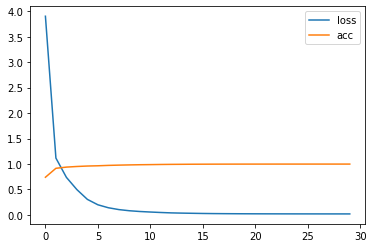

In [62]:
pd.DataFrame(history.history).plot()

In [63]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

